In [1]:
import pandas as pd

In [2]:
adult_census = pd.read_csv('datasets/adult-census.csv')
adult_census.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [3]:
# to display model diagram
from sklearn import set_config
set_config(display='diagram')

In [4]:
# drop target from dataset
target_name = 'class'
target = adult_census[target_name]
data = adult_census.drop(columns=target_name)

In [5]:
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [6]:
# select only numeric columns (skip education-num)
numeric_columns = ['age','capital-gain', 'capital-loss', 'hours-per-week']

data_numeric = data[numeric_columns]

In [7]:
# split data into train/test sets
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42, test_size=0.2)

### Model fitting with preprocessing
We can use pre-processing algorithms in sci-kit learn to transform the input data before training a model.

In this example we'll standardize the data, and then train a logistic regression model on the transformed data.

In [8]:
data_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,39073.000000,39073.000000,39073.000000,39073.000000
mean,38.622297,1073.395337,89.246897,40.428173
std,13.723791,7430.705849,406.179060,12.457886
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


Linear models such as logistic regression generally benefit from scaling the features, while other models such as decision trees do not need such pre-processing (but wil not suffer from it).

In [10]:
# Import, Instantiate, Fit
# import
from sklearn.preprocessing import StandardScaler

# instantiate
scaler = StandardScaler()

# fit
scaler.fit(data_train)

StandardScaler()

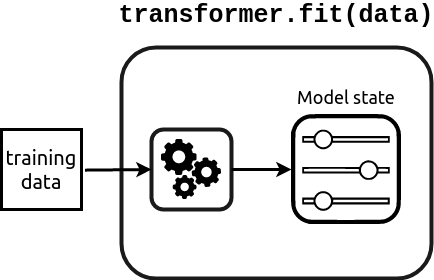

The algorithm computes the mean and standard deviation of the training data and stores them in NumPy arrays.

In [11]:
scaler.mean_

array([  38.62229673, 1073.39533693,   89.24689683,   40.42817291])

In [12]:
scaler.scale_

array([  13.72361544, 7430.61076137,  406.17386277,   12.45772691])

Once we have called the `fit` method we can perform the data transformation by calling the `transform` method. 

In [13]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[ 0.24612343, -0.14445587, -0.21972585, -0.03437007],
       [ 0.97479439, -0.14445587, -0.21972585, -0.4357274 ],
       [-0.33681334, -0.14445587, -0.21972585, -0.03437007],
       ...,
       [-0.77401591, -0.14445587, -0.21972585, -0.03437007],
       [ 0.53759181, -0.14445587, -0.21972585, -0.03437007],
       [ 1.48486406, -0.14445587, -0.21972585, -2.68332844]])

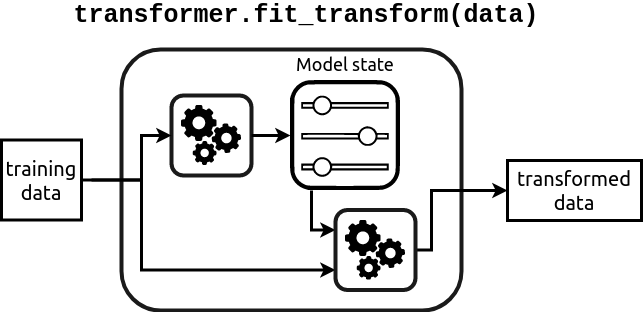

The `fit_transform()` method is a shorthand method to call successively `fit` and then `transform`.

In [15]:
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled

array([[ 0.24612343, -0.14445587, -0.21972585, -0.03437007],
       [ 0.97479439, -0.14445587, -0.21972585, -0.4357274 ],
       [-0.33681334, -0.14445587, -0.21972585, -0.03437007],
       ...,
       [-0.77401591, -0.14445587, -0.21972585, -0.03437007],
       [ 0.53759181, -0.14445587, -0.21972585, -0.03437007],
       [ 1.48486406, -0.14445587, -0.21972585, -2.68332844]])

In [16]:
data_train_scaled = pd.DataFrame(data_train_scaled, columns=data_train.columns)
data_train_scaled.describe()

,age,capital-gain,capital-loss,hours-per-week
count,3.907300e+04,3.907300e+04,3.907300e+04,3.907300e+04
mean,-1.382060e-16,3.491521e-17,4.764472e-17,-7.455852e-18
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.575554e+00,-1.444559e-01,-2.197258e-01,-3.164957e+00
25%,-7.740159e-01,-1.444559e-01,-2.197258e-01,-3.437007e-02
50%,-1.182121e-01,-1.444559e-01,-2.197258e-01,-3.437007e-02
75%,6.833260e-01,-1.444559e-01,-2.197258e-01,3.669873e-01
max,3.743744e+00,1.331325e+01,1.050475e+01,4.701646e+00


Notice that the mean of all the columns is close to 0 and the standard deviation in all cases is close to 1. We can also visualize the effect of StandardScaler using a jointplot to show both the histograms of the distributions and a scatterplot of any pair of numerical features at the same time. We can observe that StandardScaler does not change the structure of the data itself but the axes get shifted and scaled.

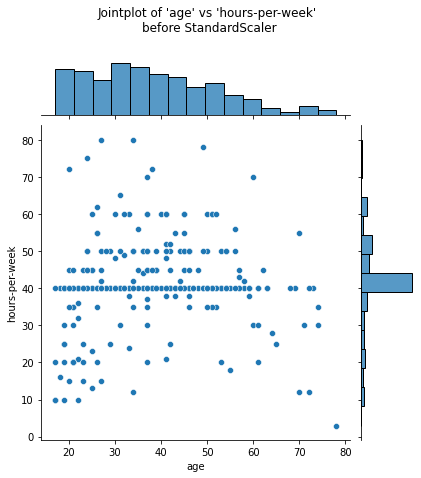

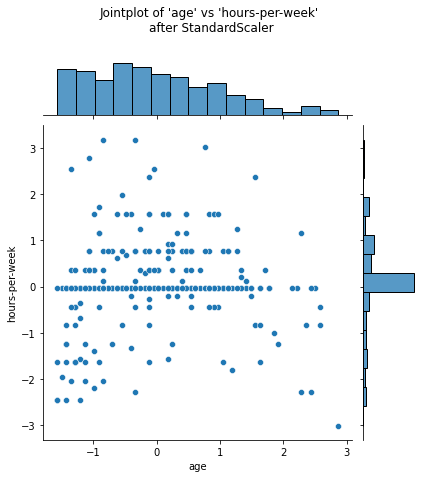

In [17]:
import matplotlib.pyplot  as plt
import seaborn as sns

# number of points to visualize to have a clearer plot
num_points_to_plot = 300

sns.jointplot(data=data_train[:num_points_to_plot], x="age",
              y="hours-per-week", marginal_kws=dict(bins=15))
plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nbefore StandardScaler", y=1.1)

sns.jointplot(data=data_train_scaled[:num_points_to_plot], x="age",
              y="hours-per-week", marginal_kws=dict(bins=15))
_ = plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nafter StandardScaler", y=1.1)

### Combining sequential operations with a sci-kit learn `Pipeline`

In [26]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [19]:
model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [20]:
model.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

In [21]:
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [22]:
elapsed_time

0.12382364273071289

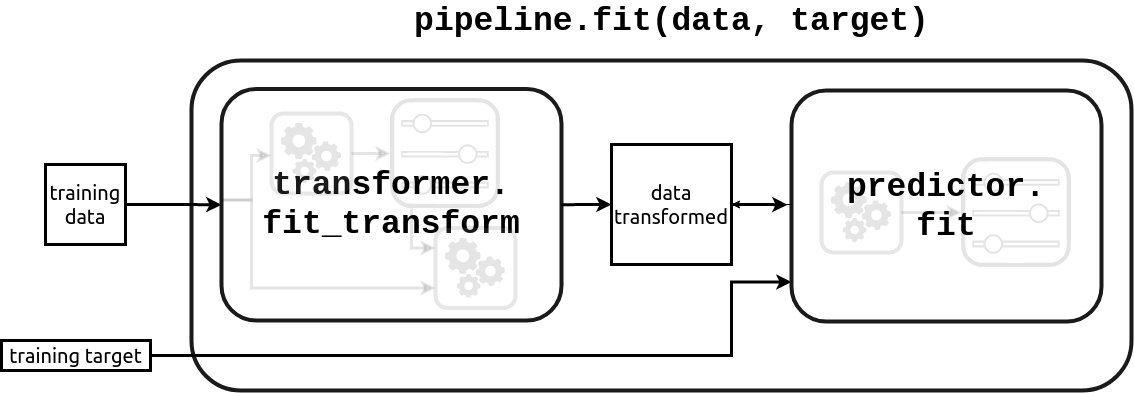

In [23]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K'], dtype=object)

### Check the score of the full predictive pipeline by calling `model.score`

In [24]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f'The accuracy using a {model_name} is {score:.3f} '
      f'with a fitting time of {elapsed_time:.3f} seconds '
      f'in {model[-1].n_iter_[0]} iterations')

The accuracy using a Pipeline is 0.808 with a fitting time of 0.124 seconds in 12 iterations


### Model evaluation using cross-validation

In [31]:
from sklearn.model_selection import cross_validate

In [32]:
%%time

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_result = cross_validate(model, data_numeric, target, cv=5)
cv_result

CPU times: user 2.21 s, sys: 2.16 s, total: 4.38 s
Wall time: 802 ms


{'fit_time': array([0.0834341 , 0.16149473, 0.137604  , 0.09672785, 0.10565233]),
 'score_time': array([0.02789426, 0.02887535, 0.05199146, 0.02736998, 0.02746534]),
 'test_score': array([0.79557785, 0.80049135, 0.79965192, 0.79873055, 0.80436118])}

In [33]:
scores = cv_result["test_score"]
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

The mean cross-validation accuracy is: 0.800 ± 0.003
